# Koch Snowflake

I learnt about the Koch curve when I was about 17 or 18.
You can see below how I coded it up without recursion or L-systems

But let's start with some code I found 
[here](https://codereview.stackexchange.com/questions/4832/koch-curve-algorithm-in-python-without-using-turtle-logo-logic).
The guy gives himself a lot of work because 

- doesn't know what complex numbers are.
- sets named variables instead of using a loop
- doesn't use zip() to show he is looping across consecutive elements
- uses loops nested 3 deep **OMG**

In [26]:
def kochenize(a,b):
    HFACTOR = (3**0.5)/6
    dx = b[0] - a[0]
    dy = b[1] - a[1]
    mid = ( (a[0]+b[0])/2, (a[1]+b[1])/2 )
    p1 = ( a[0]+dx/3, a[1]+dy/3 )
    p3 = ( b[0]-dx/3, b[1]-dy/3 )
    p2 = ( mid[0]-dy*HFACTOR, mid[1]+dx*HFACTOR )
    return p1, p2, p3

def koch(steps, width):
    arraysize = 4**steps + 1
    points = [(0.0,0.0)]*arraysize
    points[0] = (-width/2., 0.0)
    points[-1] = (width/2., 0.0)
    stepwidth = arraysize - 1
    for n in range(steps):
        segment = (arraysize-1)//stepwidth
        print(segment,arraysize)
        for s in range(segment):
            st = s*stepwidth
            a = (points[st][0], points[st][1])
            b = (points[st+stepwidth][0], points[st+stepwidth][1])
            index1 = st + (stepwidth)//4
            index2 = st + (stepwidth)//2
            index3 = st + ((stepwidth)//4)*3
            result = kochenize(a,b)
            points[index1], points[index2], points[index3] = result            
        stepwidth //= 4
    return points


## So....

let's get started 

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import imageio 

# I might run this in notebook and not lab so
%matplotlib inline
# skimage is sensitive about letting u import so....
from skimage.transform import resize, rotate

def mk_gif(frames, fn='weather.gif', duration=.3):
    with imageio.get_writer(fn, mode='I',duration=duration) as writer:
        for frame in frames:
            if frame is None: continue
            writer.append_data(frame)

I think this is cleaner 

- there is much less use of indices
- the striding in the inside *for* loop is explicit

but we will do better below :)

In [2]:
def kochenize_segment(a,b):
    HFACTOR = (3**0.5)/6
    dz = b - a
    mid = .5*(a + b)
    return a + dz/3 , mid + 1J*dz*HFACTOR, b - dz/3

def koch(steps, width):
    arraysize = 4**steps + 1
    stepwidth = arraysize
    
    pts = 1J*np.ones(arraysize)
    pts[0] = -width / 2
    pts[-1] = width / 2
    
    for n in range(steps):
        end_pts = range(0, arraysize, stepwidth) 
        for a,b in zip(end_pts, end_pts[1:]):
            new_pts = kochenize_segment( pts[a], pts[b])
            for k in range(3):
                pts[a + (k + 1)*(stepwidth//4)] = new_pts[k]         
        stepwidth //= 4
        
    return points


# Better again?

this is how I did ir when I was 18 in BASIC basically


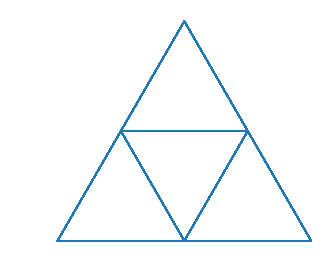

In [16]:
def deep_congruence(n):
    if n == 0 : return 0
    b = n % 4
    while b ==0 :
        n, b = n//4, n % 4
    return b

def Koch(depth=4,
         ff=1/6):
    
    W = np.exp(2*np.pi*1J*ff)
    int2dir = {0: W, 1:  W , 2: W**(-2), 3: W}
    
    T = np.array([deep_congruence(x) for x in range(4**depth)])
    
    turns = [ int2dir[t] for t in T]
    turns.append(T[3])
    
    #here we are doing turtle graphics
    pts, direction  = [0], 1
    for z in turns[1:]:
        pts.append(pts[-1] + direction)
        direction *= z
        
    return pts

def snowflake(angle=1/6,depth=4):
    pts = Koch(depth=depth, ff=angle)
    
    L = abs(pts[-1] - pts[0]) 
    R  = np.exp(-2*np.pi/3*1J)
    pts = [ z/L  - (2+R)/3 for z in pts]
    
    U = []
    for k in range(2):
        U.extend([ R*v for v in pts])
        R *= R
    pts.extend(U)
    return pts

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.axis('off')
ax.set_aspect(1) 

for t in np.linspace(1/3,1/36,1):
    pts = snowflake(angle=t,depth=3)
    X = [ z.real for z in pts]
    Y = [ z.imag for z in pts]
    
    ax.plot(X,Y)

In [331]:
sum(pts)/len(pts) , (2 + R)/3

((0.5000000000000004-0.2886751345948127j),
 (0.5000000000000002-0.288675134594813j))


# Transition from one to another

make a GIF 

This works but I ran it before importing numpy to solve a pb with github

In [1]:
frames = []
for ff in np.linspace(1/3, 1/6, 50):

    pts = snowflake(angle=ff,depth=4)
    X = [ z.real for z in pts]
    Y = [ z.imag for z in pts]
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(111)
    ax.axis('off')
    ax.set_aspect(1) 
    ax.margins(0)
    ax.plot(X,Y)
    
    fig.canvas.draw()       # draw the canvas, cache the renderer
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    frames.append( image.reshape(fig.canvas.get_width_height()[::-1] + (3,)) )
    

NameError: name 'np' is not defined

In [19]:
mk_gif(frames, 'gg.gif')

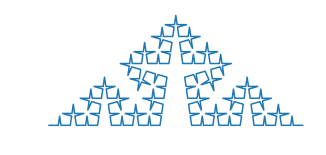

In [9]:
def Koch(depth=4,
         ff=1/6):
    
    W = np.exp(2*np.pi*1J*ff/2)
    int2dir = {0: 1, 1:  W**2, 2: W**(-4), 3: W**2}
    
    T = np.array([deep_congruence(x) for x in range(256)])
    
    turns = [ int2dir[t] for t in T]
    turns.append(T[3])
    
    #here we are doing turtle graphics
    pts, direction  = [0], 1
    for z in turns[1:]:
        pts.append(pts[-1] + direction)
        direction *= z
        
    return pts

pts = Koch(ff= 1/4.4)
X = [ z.real for z in pts]
Y = [ z.imag for z in pts]

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.axis('off')
ax.set_aspect(1) 

ax.plot(X,Y)
